Week 4.5 – Reading Data from Spreadsheet

    Name: Sathish Kumar Rajendiran
    Task: 4.5 Reading Data From Spreadsheet
    Date: 7/23/2020

In [26]:
# Using the Gas Prices data, read the file and import only the years up through 2000. 
# Modify the attached program to limit how much of the file you read and then generate the results.

# Include your code and the results you got in a file and submit here.

# price_of_gasoline.csv
# /Users/sathishrajendiran/ist652-python/

import os
import csv
import numpy as np

#verify current directory
os.getcwd()

# define file name
infile = 'price_of_gasoline.csv'

# create new empty lists:  years and prices come from data
yearsList = []
pricesList = []
# names of months for labeling results
monthList = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# read the data
with open(infile, 'r') as csvfile:
    # the csv file reader returns a list of the csv items on each line - note delimiter is comma
    priceReader = csv.reader(csvfile,  dialect='excel', delimiter=',')

    # from each line, a list of row items, make separate lists for years and for the prices
    for line in priceReader:
      # skip lines without data
      if line[0] == '' or line[0].startswith('Price') or line[0].startswith('Year'):
        continue
      else:
          try:
            # add the year to list
            if (int(line[0]) <=2000):
                yearsList.append(line[0])
             # append the prices (as strings) to the list
                pricesList.append(line[1:])
            else:
                pass         
          except IndexError:
            print ('Error: ', line)
csvfile.close()

print ("Read", len(yearsList), "years of prices")






Read 25 years of prices


In [27]:
# make a numpy array for the strings
data = np.array(pricesList)
print('Shape of Prices data', data.shape)

# convert the empty strings to strings of zeros, using a Boolean mask to find empty strings
data[data == ''] = '0'

# now we can convert the whole thing to float without getting conversion errors for the empty strings
prices = data.astype(np.float)

#print(prices)

# compute the average price for each month (or use mean)
# sum along the columns
monthTotalPrices = np.sum(prices, axis = 0)
# divide by number of years to get average
monthAveragePrices = monthTotalPrices / len(yearsList)

#print(monthAveragePrices)
print ("\nAverage gas price for each month\n")

# print the average price for each month
for i, mon in enumerate(monthList):
	print (mon, ':', monthAveragePrices[i])

# compute the average price for each year up to the last one with missing data
# sum along the rows
yearTotalPrices = np.sum(prices, axis = 1)
# divide by number of months to get average
yearAveragePrices = yearTotalPrices / 12

#print(monthAveragePrices)
print ("\nAverage gas price for each year\n")



# print the 
for i, year in enumerate(yearsList[ :-1]):
    if (int(year) <=2000):
          print (year ,':', yearAveragePrices[i])
    else:
        pass



Shape of Prices data (25, 12)

Average gas price for each month

Jan : 1.05316
Feb : 1.0490399999999998
Mar : 1.04964
Apr : 1.0727600000000002
May : 1.09616
Jun : 1.11276
Jul : 1.1088799999999999
Aug : 1.11056
Sep : 1.1160400000000001
Oct : 1.1116400000000002
Nov : 1.1075199999999998
Dec : 1.0962800000000004

Average gas price for each year

1976 : 0.6143333333333333
1977 : 0.6563333333333333
1978 : 0.6702500000000001
1979 : 0.90325
1980 : 1.2451666666666668
1981 : 1.3782499999999998
1982 : 1.2954999999999999
1983 : 1.2411666666666668
1984 : 1.2122499999999998
1985 : 1.20175
1986 : 0.9274166666666667
1987 : 0.9484166666666666
1988 : 0.9461666666666667
1989 : 1.0221666666666667
1990 : 1.1643333333333334
1991 : 1.1400833333333333
1992 : 1.1264999999999998
1993 : 1.1079166666666667
1994 : 1.1118333333333332
1995 : 1.1471666666666664
1996 : 1.2309166666666667
1997 : 1.2336666666666665
1998 : 1.0593333333333335
1999 : 1.1650833333333332


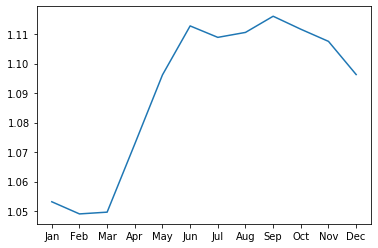

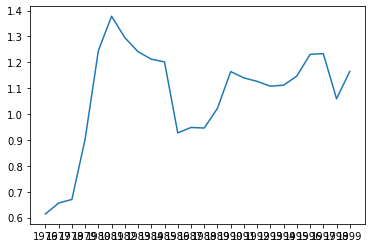

In [28]:
# or display the monthly averages as a simple plot

import matplotlib.pyplot as pp

x = np.arange(12)
pp.xticks(x,monthList)
pp.plot(x, monthAveragePrices)
pp.show()


# or we can also display the years with a simple plot
x = np.arange(len(yearsList)-1)
pp.xticks(x,yearsList)
pp.plot(x, yearAveragePrices[:-1])
pp.show()

# Done!